## Data
For Task#1, use the [Iris Data Set](https://archive.ics.uci.edu/ml/datasets/iris). 

For Task#2, use the images in folder `Project1\images` where the filenames are the corresponding class labels. For example, `182.png` is an image of Border Terrier, which is class 182 in ImageNet dataset. Please refer to [this Gist snippet](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a) for a complete list. The images are from ImageNet validation set, and so the pre-trained model has never "seen" them.

For Task#3, you may use the images in folder `Project1\style` or any other images you like.

In [1]:
# Loading packages, pls install those packages if you haven't install them
import PIL
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import random

import pandas as pd
print("pandas version: {}".format(pd.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # neural network
from sklearn import metrics

import torch
import torchvision
import torch.autograd as autograd
import torchvision.transforms as T

pandas version: 0.25.1
scikit-learn version: 0.21.3


# Task#1 MLP Structure Search

Multilayer Perceptrons, or MLPs for short, are the classical type of neural network. They are comprised of one or more layers of neurons. Data is fed to the input layer, there may be one or more hidden layers providing levels of abstraction, and predictions are made on the output layer, also called the visible layer. MLPs are suitable for classification prediction problems where inputs are assigned a class or label. However, the number of nodes in each hidder layer will affect the final prediction performance. 

Cross-validation is a statistical method used to estimate the skill of machine learning models. Please implement the k-fold cross-validation test by yourself. Do not use the k-fold method in external packages. The general procedure is as follows:
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
   1. Take the group as a hold out or test data set
   2. Take the remaining groups as a training data set
   3. Fit a model on the training set and evaluate it on the test set
   4. Retain the evaluation score and discard the model


In this project, perform a 5-fold Cross-validation test on the Iris dataset to determine the best 5-layer MLP structure (from among 1 to 4 nodes in the layer) for test prediction. Provide a plot of the average 5-fold
training and test accuracies over the different network structures.

 

In [2]:
def find_network_size(X_train, y_train):
    """
    Find the hidden node size that gives the best validation accuracy by 5-fold Cross-validation test, plots the average 5-fold 
    training and test accuracies over the different network structures.
    
    Inputs:
    - X_train: Input Features; Tensor of shape (120, 4)
    - y_train: An integer in the range [0, 3)
    
    
    Returns:
    - Nhidden: the size that gives the best validation accuracy
    """
    
    #The lists to store the training and validation accuracies cross different node size. 
    acc_train_array = []
    acc_valid_array = []
   
    
    #iteration to find the best node size 
    ##############################################################################
    # TODO: Find the hidden node size that gives the best validation accuracy by #
    #5-fold Cross-validation test.                                               #
    ##############################################################################
    
    # Task 1 - 17 Feb 2021 - 4 hours
    
    # random shuffle the X_train and y_train
    permutation = np.random.permutation(len(X_train))
    X_train_shuf = X_train[permutation]
    y_train_shuf = y_train[permutation]
    
    # list that contains the number of nodes in the hidden layers
    node_lst = [1, 2, 3, 4]
    shape = X_train.shape
    # 5-folds
    k = 5
    i = 0
    # iterate the training for each number of nodes among 1 to 4
    for num_node in node_lst:
        run_score_tra = 0
        run_score_val = 0
        # iterate the trainings for k times using different sub-groups of training and validation
        for i in range(k):
            start = int(i*(len(X_train)/k))
            end = int((i+1)*(len(X_train)/k))
            X_tra = np.delete(X_train_shuf, slice(start, end), axis=0)
            X_val = X_train_shuf[start:end]
            y_tra = np.delete(y_train_shuf, slice(start, end), axis=0)
            y_val = y_train_shuf[start:end]
            
            # create the MLP classifier instance
            clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(num_node,num_node,num_node,num_node,num_node), random_state=1)
            clf.fit(X_tra, y_tra)
            # accumulate the scores of training and validation for k times training
            run_score_tra += clf.score(X_tra, y_tra)
            run_score_val += clf.score(X_val, y_val)
        
        # get the average scores of the training and validation for current number of nodes and store
        acc_train_array.append(run_score_tra/k)
        acc_valid_array.append(run_score_val/k)
    
    # get the the number of nodes of highest validation accuracy score
    Best_Nhidden = node_lst[np.argmax(acc_valid_array)]
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

      
    ##############################################################################
    # TODO: Plots  the average 5-fold training and test accuracies over the      #
    #different node size.                                                        #
    ##############################################################################
    
    # scatter plot the training and validation accuracy versus number of nodes from 1 to 4
    fig, axs = plt.subplots(1, 2, figsize=(10,5))
    axs[0].scatter(range(1,5), acc_train_array)
    axs[0].set_title('Training accuracy vs number of nodes')
    axs[0].set_xlabel('Number of nodes')
    axs[0].set_ylabel('Accuracy')
    axs[1].scatter(range(1,5), acc_valid_array)
    axs[1].set_title('Validation accuracy vs number of nodes')
    axs[1].set_xlabel('Number of nodes')
    axs[1].set_ylabel('Accuracy')
    plt.show()
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################
    return Best_Nhidden

        
    

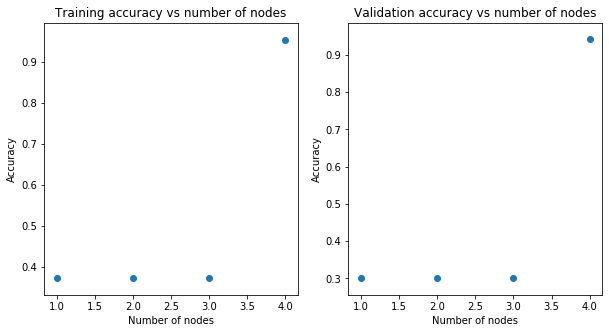

best hidden node size = 4 based on 5-fold cross-validation on training set
test accuracy = 0.8666666666666667


In [3]:
## load data
iris_dataset = load_iris()
## shuffle and split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], 
                                                        iris_dataset['target'], 
                                                        test_size=0.20, 
                                                        random_state=1)
## find the best hidden node size using only the training set
Nhidden = find_network_size(X_train, y_train)
print('best hidden node size =', Nhidden, 'based on 5-fold cross-validation on training set')

## perform evaluation
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(Nhidden,Nhidden,Nhidden,Nhidden,Nhidden), random_state=1)
clf.fit(X_train, y_train)

## trained output
y_test_predict = clf.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test_predict,y_test)

print('test accuracy =', test_accuracy)

## Pretrained Model (for task 2 and task 3)

For this project, you will use MLP and a pre-trained deep neural network, [SqueezeNet](https://arxiv.org/abs/1602.07360), which is lightweight and runs fast on CPUs. Run the code below to load a pre-trained SqueezeNet from the PyTorch official model zoo.

In [4]:
# Test and set the device.
if torch.cuda.is_available():
    device = 'cuda:0'
else:
    device = 'cpu'
print('Use', device)

# Download and load the pretrained SqueezeNet model.
model = torchvision.models.squeezenet1_1(pretrained=True).to(device)

# Disable the gradient computation with respect to model parameters.
for param in model.parameters():
    param.requires_grad = False

Use cpu




## Helper Functions (for task 2 and task 3)

Most pre-trained models are trained on images that had been preprocessed by subtracting the per-color mean and dividing by the per-color standard deviation. Here are a few helper functions for performing and undoing this preprocessing.

In [5]:
IMAGENET_MEAN = np.array([0.485, 0.456, 0.406])
IMAGENET_STD = np.array([0.229, 0.224, 0.225])

def preprocess(img, size=(224, 224)):
    transform = T.Compose([
        T.Resize(size),
        T.ToTensor(),
        T.Normalize(mean=IMAGENET_MEAN.tolist(),
                    std=IMAGENET_STD.tolist()),
        T.Lambda(lambda x: x[None]),
    ])
    return transform(img)

def deprocess(img, should_rescale=True):
    transform = T.Compose([
        T.Lambda(lambda x: x[0]),
        T.Normalize(mean=[0, 0, 0], std=(1.0 / IMAGENET_MEAN).tolist()),
        T.Normalize(mean=(-IMAGENET_STD).tolist(), std=[1, 1, 1]),
        T.Lambda(rescale) if should_rescale else T.Lambda(lambda x: x),
        T.ToPILImage(),
    ])
    return transform(img)

def rescale(x):
    low, high = x.min(), x.max()
    x_rescaled = (x - low) / (high - low)
    return x_rescaled

def blur_image(X, sigma=1):
    X_np = X.cpu().clone().numpy()
    X_np = gaussian_filter1d(X_np, sigma, axis=2)
    X_np = gaussian_filter1d(X_np, sigma, axis=3)
    X.copy_(torch.Tensor(X_np).type_as(X))
    return X

# Task#2 Class Visualization
By starting with a random noise image and performing gradient ascent on a target class, we can generate an image that the network will recognize as the target class. This idea was first presented in [2]; [3] extended this idea by suggesting several regularization techniques that can improve the quality of the generated image.

Concretely, let $I$ be an image and let $y$ be a target class. Let $s_y(I)$ be the score that a convolutional network assigns to the image $I$ for class $y$; note that these are raw unnormalized scores, not class probabilities. We wish to generate an image $I^*$ that achieves a high score for the class $y$ by solving the problem

$$
I^* = \arg\max_I (s_y(I) - R(I))
$$

where $R$ is a (possibly implicit) regularizer (note the sign of $R(I)$ in the argmax: we want to minimize this regularization term). We can solve this optimization problem using gradient ascent, computing gradients with respect to the generated image. We will use (explicit) L2 regularization of the form

$$
R(I) = \lambda \|I\|_2^2
$$

**and** implicit regularization as suggested by [3] by periodically blurring the generated image. We can solve this problem using gradient ascent on the generated image.

In the cell below, complete the implementation of the `create_class_visualization` function.

[2] [Karen Simonyan, Andrea Vedaldi, and Andrew Zisserman, "Deep Inside Convolutional Networks: Visualising
Image Classification Models and Saliency Maps", ICLR Workshop 2014](https://arxiv.org/abs/1312.6034)

[3] [Yosinski et al, "Understanding Neural Networks Through Deep Visualization", ICML 2015 Deep Learning Workshop](https://arxiv.org/abs/1506.06579)


In [6]:
def jitter(X, ox, oy):
    """
    Helper function to randomly jitter an image.
  
    Inputs
    - X: PyTorch Tensor of shape (N, C, H, W)
    - ox, oy: Integers giving number of pixels to jitter along W and H axes
    
    Returns: A new PyTorch Tensor of shape (N, C, H, W)
    """
    if ox != 0:
        left = X[:, :, :, :-ox]
        right = X[:, :, :, -ox:]
        X = torch.cat([right, left], dim=3)
    if oy != 0:
        top = X[:, :, :-oy]
        bottom = X[:, :, -oy:]
        X = torch.cat([bottom, top], dim=2)
    return X

In [7]:
def create_class_visualization(target_y, model, device, **kwargs):
    '''
    Generate an image to maximize the score of target_y under a pretrained model.
    
    Inputs:
    - target_y: A list of two elements, where the first value is an integer in the range [0, 1000) giving the index of the
                class, and the second value is the name of the class.
    - model: A pretrained CNN that will be used to generate the image
    - dtype: Torch datatype to use for computations
    
    Keyword arguments:
    - l2_reg: Strength of L2 regularization on the image
    - learning_rate: How big of a step to take
    - num_iterations: How many iterations to use
    - blur_every: How often to blur the image as an implicit regularizer
    - max_jitter: How much to gjitter the image as an implicit regularizer
    - show_every: How often to show the intermediate result
    '''
    model.to(device)
    l2_reg = kwargs.pop('l2_reg', 1e-3)
    learning_rate = kwargs.pop('learning_rate', 25)
    num_iterations = kwargs.pop('num_iterations', 100)
    blur_every = kwargs.pop('blur_every', 10)
    max_jitter = kwargs.pop('max_jitter', 16)
    show_every = kwargs.pop('show_every', 25)
    
    # Randomly initialize the image as a PyTorch Tensor, and make it requires gradient.
    img = torch.randn(1, 3, 224, 224).mul_(1.0).to(device).requires_grad_()

    for t in range(num_iterations):
        # Randomly jitter the image a bit; this gives slightly nicer results
        ox, oy = random.randint(0, max_jitter), random.randint(0, max_jitter)
        img.data.copy_(jitter(img.data, ox, oy))

        ########################################################################
        # TODO: Use the model to compute the gradient of the score for the     #
        # class target_y with respect to the pixels of the image, and make a   #
        # gradient step on the image using the learning rate. Don't forget the #
        # L2 regularization term!                                              #
        # Be very careful about the signs of elements in your code.            #
        ########################################################################
        
        # Task 2 - 18 Feb 2021 - 4 hours
        # get the 1000 dimension score matrix of the input image
        score = model(img)
        # get the score for the specific input image
        label = target_y[0]
        score_tar = score[0, label]
        # perform back propagation
        score_tar.backward()
        # get the gradient of the input image
        grad = img.grad.data
        # take l2 regularization into consideration
        grad = grad - l2_reg * img.data * 4
        # update the input image using gradient ascent
        img.data = img.data + learning_rate * grad
        # zero out the input image gradient
        img.grad.data.zero_()
        
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

        # Undo the random jitter
        img.data.copy_(jitter(img.data, -ox, -oy))

        # As regularizer, clamp and periodically blur the image
        for c in range(3):
            lo = float(-IMAGENET_MEAN[c] / IMAGENET_STD[c])
            hi = float((1.0 - IMAGENET_MEAN[c]) / IMAGENET_STD[c])
            img.data[:, c].clamp_(min=lo, max=hi)
        if t % blur_every == 0:
            blur_image(img.data, sigma=0.5)

        # Periodically show the image
        if t == 0 or (t + 1) % show_every == 0 or t == num_iterations - 1:
            plt.imshow(deprocess(img.data.clone().cpu()))
            class_name = target_y[1]
            plt.title('%s\nIteration %d / %d' % (class_name, t + 1, num_iterations))
            plt.gcf().set_size_inches(4, 4)
            plt.axis('off')
            plt.show()

    return deprocess(img.data.cpu())

Once you have completed the implementation in the cell above, run the following cell to generate an image of a Tarantula:

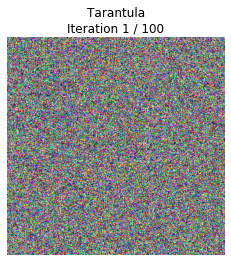

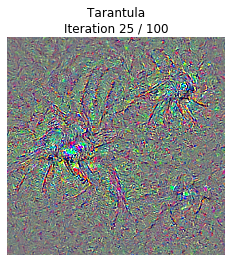

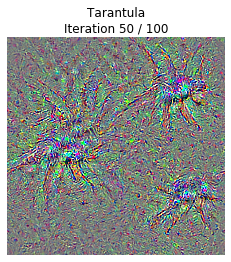

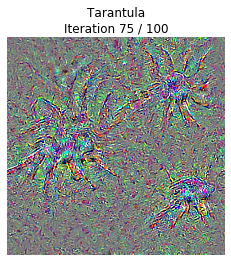

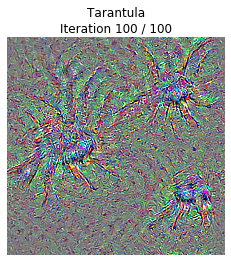

In [8]:
target_y = [76, "Tarantula"]
# target_y = 366 # Gorilla
out = create_class_visualization(target_y, model, device)

# Task#3 Style Transfer

Another task which is closely related to image gradients is style transfer which has become a "cool" application in deep learning for computer vision applications. You need to study and implement the style transfer technique presented in the following paper [4] where the general idea is to take two images (a content image and a style image), and produce a new image that reflects the content of one but the artistic "style" of the other.

[4] [Gatys, Leon A., Alexander S. Ecker, and Matthias Bethge. "Image style transfer using convolutional neural networks." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2016.](http://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)

Below is an example.

![](style_transfer.png)

## Compute the loss

To perform style transfer, you will need to first formulate a special loss function that matches the content and style of each respective image in the feature space, and then perform gradient descent on the pixels of the image itself.

The loss function contains two parts: **content loss** and **style loss**. Read the paper [4] for details about the losses and implement them below.

In [9]:
def content_loss(content_weight, content_current, content_original):
    """
    Compute the content loss for style transfer.
    
    Inputs:
    - content_weight: Scalar giving the weighting for the content loss.
    - content_current: features of the current image; this is a PyTorch Tensor of shape
      (1, C_l, H_l, W_l).
    - content_target: features of the content image, Tensor with shape (1, C_l, H_l, W_l).
    
    Returns:
    - scalar content loss
    """
    
    ##############################################################################
    # TODO: Implement content loss function                                      #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    
    content_loss = torch.sum(torch.pow((content_current - content_original), 2)) * content_weight
    
    return content_loss

    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################


def gram_matrix(features):
    """
    Compute the normalized Gram matrix from features.
    The Gram matrix will be used to compute style loss.
    
    Inputs:
    - features: PyTorch Tensor of shape (N, C, H, W) giving features for
      a batch of N images.
    
    Returns:
    - gram: PyTorch Tensor of shape (N, C, C) giving the
      normalized Gram matrices for the N input images.
    """    
    ##############################################################################
    # TODO: Implement the normalized Gram matrix compuation function             #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    
    n, c, h, w = features.size()
    features = features.view(n*c, -1)
    gram = torch.mm(features, features.t())

    return gram
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################


def style_loss(feats, style_layers, style_targets, style_weights):
    """
    Computes the style loss at a set of layers.
    
    Inputs:
    - feats: list of the features at every layer of the current image.
    - style_layers: List of layer indices into feats giving the layers to include in the
      style loss.
    - style_targets: List of the same length as style_layers, where style_targets[i] is
      a PyTorch Variable giving the Gram matrix of the source style image computed at
      layer style_layers[i].
    - style_weights: List of the same length as style_layers, where style_weights[i]
      is a scalar giving the weight for the style loss at layer style_layers[i].
      
    Returns:
    - style_loss: A PyTorch Tensor holding a scalar giving the style loss.
    """
    
    ##############################################################################
    # TODO: Implement style loss function                                        #
    # Note: It should not be very much code (less than 10 lines)                 #
    ##############################################################################
    
    style_loss = 0
    for i in range(len(style_layers)):
        gram = gram_matrix(feats[style_layers[i]])
        style_loss = style_loss + style_weights[i] * torch.sum(torch.pow((gram-style_targets[i]), 2))
    
    return style_loss
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ##############################################################################

## Putting them together

With these loss functions, you can now build your style transfer model. Implement the function below to perform style transfer. To test the model, you can use the content and style images that we have provided in `Project1/style`, or improvise using any image you like. Please save your output images in the `Project1/style` folder.

Design and carry out some experiments (on your own!) to analyse how **the choice of layers** and **the weights** will influence the output image. Write down your observations and analysis in the Markdown cell provided below.

In [10]:
def style_transfer(content_image, style_image, content_layer, content_weight,
                   style_layers, style_weights, max_iter):
    """
    Run style transfer!
    You may first resize the image to a small size for fast computation.
    
    Inputs:
    - content_image: filename of content image
    - style_image: filename of style image
    - content_layer: an index indicating which layer to use for content loss
    - content_weight: weighting on content loss
    - style_layers: list of indices indicating which layers to use for style loss
    - style_weights: list of weights to use for each layer in style_layers
    - max_iter: max iterations of gradient updates
    
    Returns:
    - output_image: an image with content from the content_image and 
    style from the style image
    """
    ##############################################################################
    # TODO: Implement the function for style transfer.                           #
    ##############################################################################
    
    feature_con = []
    feature_sty = []
    
    # create content image features for each layer of model
    input_img = content_image
    for number, layer in model.features._modules.items():
        output_img = layer(input_img)
        feature_con.append(output_img)
        input_img = output_img
    
    # create content target
    content_target = feature_con[content_layer]
    
    # create style image features for each layer of model
    input_img = style_image
    for number, layer in model.features._modules.items():
        output_img = layer(input_img)
        feature_sty.append(output_img)
        input_img = output_img
    
    # create content image tensor with gradient required
    img_withgrad = content_image.clone().detach().requires_grad_(True)
    
    # create style target
    style_target = []
    for i in style_layers:
        style_target.append(gram_matrix(feature_sty[i]))
        
    # initialize the optimizer
    lr = 0.05
    optimizer = torch.optim.Adam([img_withgrad], lr=lr)
    loss_lst = []
    
    # iterate and optimize the loss
    for i in range(max_iter):

        # extract features for current optimized image
        features =[]
        input_img = img_withgrad
        for number, layer in model.features._modules.items():
            output_img = layer(input_img)
            features.append(output_img)
            input_img = output_img
        
        # get the total loss from content loss and style loss
        con_loss = content_loss(content_weight, features[content_layer], content_target)
        sty_loss = style_loss(features, style_layers, style_target, style_weights)
        total_loss = con_loss + sty_loss
        total_loss.backward()
        loss_lst.append(total_loss)
        optimizer.step()
        optimizer.zero_grad()
        
        # print out the loss partially
        if i == 0:
            print('The total loss at iteration {} is: {}'.format(i+1, total_loss))
        if (i+1) % 50 == 0:
            print('The total loss at iteration {} is: {}'.format(i+1, total_loss))
        
    return img_withgrad, loss_lst
    
    ##############################################################################
    #                             END OF YOUR CODE                               #
    ############################################################################## 

The total loss at iteration 1 is: 6.194209994729062e+16
The total loss at iteration 50 is: 1364091008450560.0
The total loss at iteration 100 is: 409294243627008.0
The total loss at iteration 150 is: 238812798124032.0
The total loss at iteration 200 is: 168554783571968.0


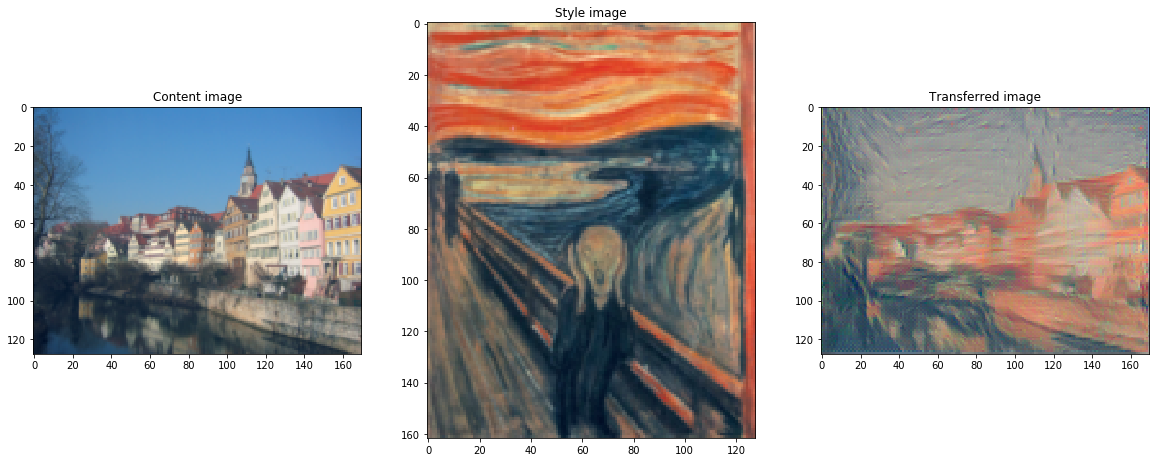

In [11]:
##############################################################################
# TODO: 1. Choose one pair of images under 'Project1/style', and finish the  # 
#          neural style transfer task by calling the style_transfer function.#
#       2. Show the 3 related images: content image, style image and the     # 
#          generated style-transferred image.                                #
##############################################################################

# load the content image and style image from the folder
content_image = preprocess(PIL.Image.open('./style/tubingen.jpg'), size=128)
content_image_orig = preprocess(PIL.Image.open('./style/tubingen.jpg'), size=128)
style_image = preprocess(PIL.Image.open('./style/the_scream.jpg'), size=128)
style_image_orig = preprocess(PIL.Image.open('./style/the_scream.jpg'), size=128)

# initialize the parameters and do the neural style transfer
content_layer = 6
content_weight = 1e-4
style_layers = [1, 4, 7, 10]
style_weights = [5000000, 1000, 20, 2]
max_iter = 200
transferred_img, loss_lst = style_transfer(content_image, style_image, content_layer, content_weight, style_layers, style_weights, max_iter)

# plot the original content image, style image and transferred image
fig, axs = plt.subplots(1, 3, figsize=(20,10))
axs[0].imshow(deprocess(content_image_orig))
axs[0].set_title('Content image')
axs[1].imshow(deprocess(style_image_orig))
axs[1].set_title('Style image')
axs[2].imshow(deprocess(transferred_img))
axs[2].set_title('Transferred image')
plt.show()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

---

**Write your observations and analysis in this Markdown cell:**  
we can see from below transferred images comparison that when we increase the number of interations, the optimised loss will decrease. However, when the loss is larger, the transferred image is more close to the content image. We can refer to the image with 10 iterations, we can clearly see buildings shape or even the windows. But when we refer to the image with 2000 iterations, the whole image style becomes blurred and close to the style image including the pixels color. This can be a way for us to control the final transferred image, for example, whether you want the content image to dominate the final image or you want the style image to dominate the final image. 
![alt text](transferred_img.jpeg)

---